In [1]:
from matplotlib.pylab import logistic
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import adjusted_rand_score, homogeneity_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt



In [2]:

# Caricamento del dataset
X, y = load_digits(return_X_y= True, as_frame = True)

# pipeline1 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
#     ('svc', SVC())
# ])


c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
         

Parametri con pca: {'tol': 0.001, 'probability': True, 'kernel': 'rbf'}


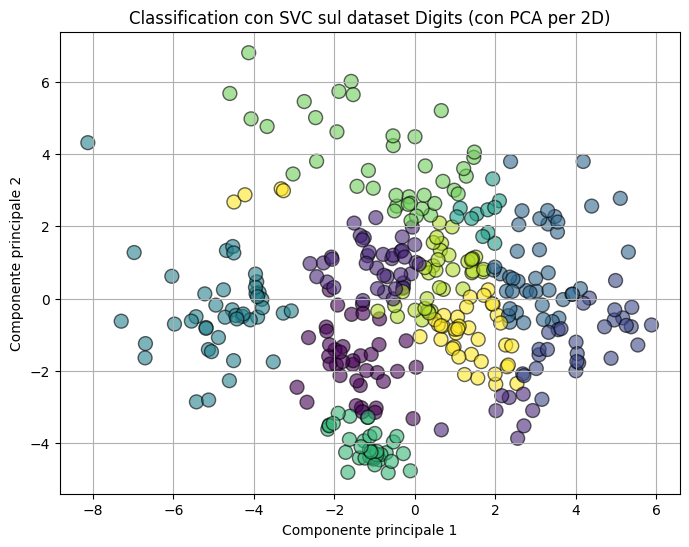

In [ ]:

#Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


#PCA
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X)



#Splittiamo i dati
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Ottimizzazione e inizializzazione SVC
param = {
    'kernel' : ['rbf','sigmoid'],
    'probability' : [True, False],
    'tol' : [1e-3, 1e-4, 1e-5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
svc = SVC(random_state = 42)

random_search = RandomizedSearchCV(
    svc, param_distributions=param, n_iter=12, cv=cv,
    scoring='f1', random_state=42)


In [16]:

#Fit senza pca
random_search = random_search.fit(X_train, y_train)
print("Parametri senza pca:", random_search.best_params_)
svc.set_params(**random_search.best_params_).fit(X_train, y_train)

#Predict
y_pred = svc.predict(X_test)


c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
         

Parametri senza pca: {'tol': 0.001, 'probability': True, 'kernel': 'rbf'}


In [ ]:

#Fit con pca
random_search_pca = random_search.fit(X_pca_train, y_train)
print("Parametri con pca:",random_search_pca.best_params_)
svc.set_params(**random_search_pca.best_params_).fit(X_pca_train, y_train)

#Predict
y_pred_pca = svc.predict(X_pca_test)


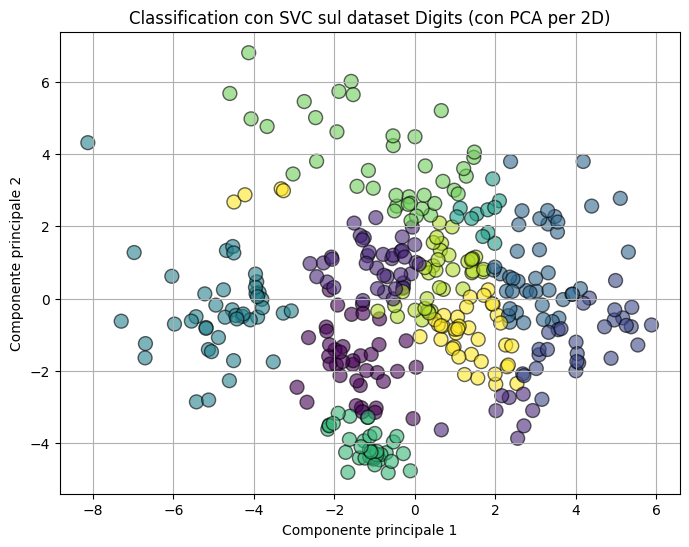

In [15]:

#Grafici
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred_pca, cmap='viridis', marker='o', s=100, edgecolors='k', alpha=0.6)
plt.title('Classification con SVC sul dataset Digits (con PCA per 2D)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.grid(True)
plt.show()

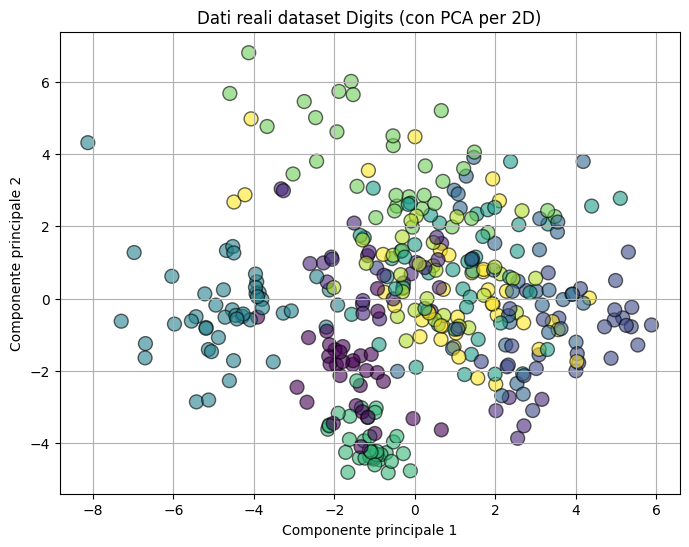

In [11]:
#Grafici
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, cmap='viridis', marker='o', s=100, edgecolors='k', alpha=0.6)
plt.title('Dati reali dataset Digits (con PCA per 2D)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.grid(True)
plt.show()